In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from pandas import *

### Series

Represent one-dimensional data structure.

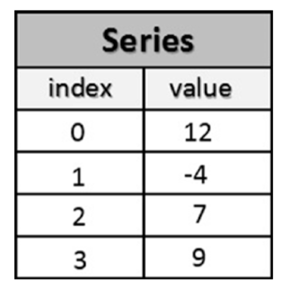

In [4]:
labels = ['a','b','c']
my_data = [10,20,30]
arr = np.array(my_data)
d = {'a':10, 'b':20, 'c':30}

If you do not specify any index during the definition of the series, by default, pandas will assign numerical values increasing from 0 as labels.

In [5]:
pd.Series(data=my_data)

0    10
1    20
2    30
dtype: int64

Assign labels

In [6]:
pd.Series(data=my_data, index=labels)

a    10
b    20
c    30
dtype: int64

In [7]:
# or leave out 'data=' and 'index='
pd.Series(my_data,labels)

a    10
b    20
c    30
dtype: int64

In [8]:
# make the dictionary as a series
pd.Series(d)

a    10
b    20
c    30
dtype: int64

In [9]:
ser1 = pd.Series(my_data,labels)

In [10]:
# get value by the index
ser1['a']

10

In [11]:
# get value by position
ser1[0]

10

In [12]:
# get all the values
ser1.values

array([10, 20, 30])

In [13]:
# get all the indexes
ser1.index

Index(['a', 'b', 'c'], dtype='object')

In [14]:
ser2 = pd.Series(my_data,labels)
ser2

a    10
b    20
c    30
dtype: int64

In [15]:
# add by corresponding labels
ser1 + ser2

a    20
b    40
c    60
dtype: int64

In [16]:
ser3 = pd.Series([10,20,30],['a','c','d'])
ser3

a    10
c    20
d    30
dtype: int64

In [17]:
ser2 + ser3

a    20.0
b     NaN
c    50.0
d     NaN
dtype: float64

When creating a series from a list or a NumPy array, the value is not copied, but passed by reference.

#### Filtering

In [18]:
ser1

a    10
b    20
c    30
dtype: int64

In [19]:
ser1[ser1>10]

b    20
c    30
dtype: int64

#### Unique, Count, IsIn

In [20]:
# unique function
serd = pd.Series([1,0,2,1,2,3], index=['white','white','blue','green',' green','yellow'])

In [21]:
serd

white     1
white     0
blue      2
green     1
 green    2
yellow    3
dtype: int64

In [22]:
serd.unique()

array([1, 0, 2, 3])

In [23]:
# value counts function
serd.value_counts()

2    2
1    2
3    1
0    1
dtype: int64

In [24]:
# isin function

In [25]:
serd.isin([0,3])

white     False
white      True
blue      False
green     False
 green    False
yellow     True
dtype: bool

In [26]:
serd[serd.isin([0,3])]

white     0
yellow    3
dtype: int64

### DataFrames

The dataframe consists of an ordered collection of columns, each of which can contain a value of a different type (numeric, string, Boolean, etc.).

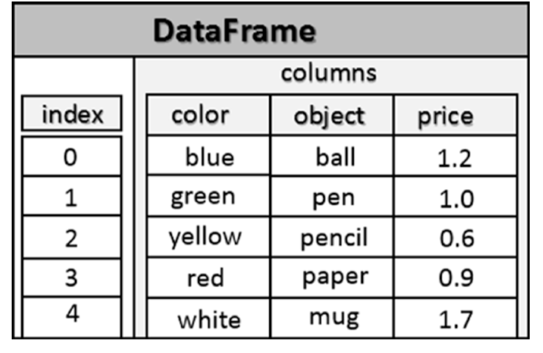

In [27]:
# e.g. create a dataframe from a dictionary
data = {'color' : ['blue','green','yellow','red','white'], 
        'object' : ['ball','pen','pencil','paper','mug'], 
        'price' : [1.2,1.0,0.6,0.9,1.7]}
frame = pd.DataFrame(data)
frame

,color,object,price
0,blue,ball,1.2
1,green,pen,1.0
2,yellow,pencil,0.6
3,red,paper,0.9
4,white,mug,1.7


In [28]:
from numpy.random import randn

In [29]:
np.random.seed(101)

In [30]:
# create a data frame with specifying indexes and column names
# this is the same
# df = pd.DataFrame(randn(5,4),index = ['A','B','C','D','E'], columns = ['W','X','Y','Z'])
df = pd.DataFrame(randn(5,4),['A','B','C','D','E'],['W','X','Y','Z'])

In [31]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


#### Selecting columns

In [32]:
# or df.W
df['W']

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [33]:
type(df['W'])

pandas.core.series.Series

In [34]:
type(df)

pandas.core.frame.DataFrame

In [35]:
df[['W','Z']]

,W,Z
A,2.706850,0.503826
B,0.651118,0.605965
C,-2.018168,-0.589001
D,0.188695,0.955057
E,0.190794,0.683509


In [36]:
# new column based on numerical operations
df['new'] = df['W'] + df['Y']

In [37]:
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


In [38]:
df.drop('new',axis=1)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [39]:
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


**using inplace='true' to truly remove the data**

In [40]:
df.drop('new',axis=1,inplace=True)
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [41]:
# axis = 1 represents column and 0 represents row
df.drop('E',axis=0,inplace=True)
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057


In [42]:
df[['Z','X']]

,Z,X
A,0.503826,0.628133
B,0.605965,-0.319318
C,-0.589001,0.740122
D,0.955057,-0.758872


#### Change indexes and columns

In [43]:
df_new = df.copy()
df_new

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057


In [44]:
df_new.index = ['$A', '$B', '$C','$D']
df_new.columns = ['$W','$X','Y','Z']
df_new

,$W,$X,Y,Z
$A,2.706850,0.628133,0.907969,0.503826
$B,0.651118,-0.319318,-0.848077,0.605965
$C,-2.018168,0.740122,0.528813,-0.589001
$D,0.188695,-0.758872,-0.933237,0.955057


#### Assign and change names

In [45]:
df_new.index.name = '_index'
df_new.columns.name = '_column'
df_new

_column,$W,$X,Y,Z
_index,,,,
$A,2.706850,0.628133,0.907969,0.503826
$B,0.651118,-0.319318,-0.848077,0.605965
$C,-2.018168,0.740122,0.528813,-0.589001
$D,0.188695,-0.758872,-0.933237,0.955057


#### Selecting rows

Select with *loc* (by index) and *iloc* (by row position, starting from 0)

In [46]:
df.loc['C']

W   -2.018168
X    0.740122
Y    0.528813
Z   -0.589001
Name: C, dtype: float64

In [47]:
df.iloc[2]

W   -2.018168
X    0.740122
Y    0.528813
Z   -0.589001
Name: C, dtype: float64

In [48]:
# select multiple rows
df.loc[['C','B']]

,W,X,Y,Z
C,-2.018168,0.740122,0.528813,-0.589001
B,0.651118,-0.319318,-0.848077,0.605965


In [49]:
df.iloc[[2,1]]

,W,X,Y,Z
C,-2.018168,0.740122,0.528813,-0.589001
B,0.651118,-0.319318,-0.848077,0.605965


#### Subsets

Select with *loc* (by indexes) and *iloc* (by positions, starting from 0)

In [66]:
# row first, then column
df.loc['B','Y']

-0.031579143908112575

In [68]:
# this will not work
# df.loc['B','Y']
# so the sequence should be row -> column

In [55]:
df.iloc[1,2]

-0.8480769834036315

In [57]:
# These two are the same
df.iloc[1][2]

-0.8480769834036315

In [69]:
# multiple rows and columns (rows go first, and then columns)
df_sub = df.loc[['A','B'],['W','Y']]
df_sub

,W,Y
A,-0.993263,-1.136645
B,1.025984,-0.031579


In [61]:
df_sub.shape

(2, 2)

#### Conditional Selection

In [6]:
from numpy.random import randn
df = pd.DataFrame(randn(5,4),['A','B','C','D','E'],['W','X','Y','Z'])
df

,W,X,Y,Z
A,-0.742294,0.400944,-0.080992,0.834772
B,-0.702831,-1.683931,-0.108537,0.055337
C,0.537152,0.804505,0.400472,-1.088055
D,-0.137683,-1.379897,-0.552391,0.844088
E,0.468915,0.925738,-0.275318,1.320378


In [7]:
df > 0

,W,X,Y,Z
A,False,True,False,True
B,False,False,False,True
C,True,True,True,False
D,False,False,False,True
E,True,True,False,True


In [8]:
booldf = df > 0

In [9]:
df[booldf]

,W,X,Y,Z
A,NaN,0.400944,NaN,0.834772
B,NaN,NaN,NaN,0.055337
C,0.537152,0.804505,0.400472,NaN
D,NaN,NaN,NaN,0.844088
E,0.468915,0.925738,NaN,1.320378


In [10]:
df['W'] > 0

A    False
B    False
C     True
D    False
E     True
Name: W, dtype: bool

In [15]:
# find data where row W is larger than 0
resultdf = df[df['W'] > 0]
resultdf

,W,X,Y,Z
C,0.537152,0.804505,0.400472,-1.088055
E,0.468915,0.925738,-0.275318,1.320378


In [21]:
# grab a subset of the result
df[df['W'] > 0][['Y','X']]

,Y,X
C,0.400472,0.804505
E,-0.275318,0.925738


In [22]:
# or break into several steps
boolser = df['W'] > 0
result = df[boolser]
mycols = ['Y','X']
result[mycols]

,Y,X
C,0.400472,0.804505
E,-0.275318,0.925738


In [26]:
# two conditions
# and
df[(df['W'] > 0) & (df['Y'] > 0)]

,W,X,Y,Z
C,0.537152,0.804505,0.400472,-1.088055


In [27]:
# or
df[(df['W'] > 0) | (df['Y'] > 0)]

,W,X,Y,Z
C,0.537152,0.804505,0.400472,-1.088055
E,0.468915,0.925738,-0.275318,1.320378


In [30]:
# index becomes a column
df.reset_index()

,index,W,X,Y,Z
0,A,-0.742294,0.400944,-0.080992,0.834772
1,B,-0.702831,-1.683931,-0.108537,0.055337
2,C,0.537152,0.804505,0.400472,-1.088055
3,D,-0.137683,-1.379897,-0.552391,0.844088
4,E,0.468915,0.925738,-0.275318,1.320378


In [32]:
# but it does not change the original dataframe
df

,W,X,Y,Z
A,-0.742294,0.400944,-0.080992,0.834772
B,-0.702831,-1.683931,-0.108537,0.055337
C,0.537152,0.804505,0.400472,-1.088055
D,-0.137683,-1.379897,-0.552391,0.844088
E,0.468915,0.925738,-0.275318,1.320378


In [34]:
# set a new index
newind = 'CA NY WY OR CO'.split()
newind

['CA', 'NY', 'WY', 'OR', 'CO']

In [35]:
df['States'] = newind
df

,W,X,Y,Z,States
A,-0.742294,0.400944,-0.080992,0.834772,CA
B,-0.702831,-1.683931,-0.108537,0.055337,NY
C,0.537152,0.804505,0.400472,-1.088055,WY
D,-0.137683,-1.379897,-0.552391,0.844088,OR
E,0.468915,0.925738,-0.275318,1.320378,CO


In [37]:
df.set_index('States')
# use 'inplace = true' to truly change the original dataframe

,W,X,Y,Z,States
A,-0.742294,0.400944,-0.080992,0.834772,CA
B,-0.702831,-1.683931,-0.108537,0.055337,NY
C,0.537152,0.804505,0.400472,-1.088055,WY
D,-0.137683,-1.379897,-0.552391,0.844088,OR
E,0.468915,0.925738,-0.275318,1.320378,CO


### Multi-Index and Index Hierarchy

In [38]:
outside = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [40]:
df = pd.DataFrame(np.random.randn(6,2),index=hier_index,columns=['A','B'])
df

A         B
G1 1 -0.088721  0.045223
   2  1.837417 -1.062222
   3  2.659183  1.704585
G2 1 -0.701990 -0.632249
   2  0.021922  0.188029
   3  0.482051 -1.848865

In [41]:
df.loc['G1']

,A,B
1,-0.088721,0.045223
2,1.837417,-1.062222
3,2.659183,1.704585


In [46]:
df.index.names = ['Groups','Num']
df

A         B
Groups Num                    
G1     1   -0.088721  0.045223
       2    1.837417 -1.062222
       3    2.659183  1.704585
G2     1   -0.701990 -0.632249
       2    0.021922  0.188029
       3    0.482051 -1.848865

In [47]:
# grab data from multi-levels
df.loc['G2'].loc[2]['B']

0.1880290192162513

In [48]:
df.xs('G1')

,A,B
Num,,
1,-0.088721,0.045223
2,1.837417,-1.062222
3,2.659183,1.704585


In [51]:
# grab cross-section data
df.xs(1,level='Num')

,A,B
Groups,,
G1,-0.088721,0.045223
G2,-0.701990,-0.632249
